Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

###**Q1.Plotting L(w),L(w* ) and w***###

**plot_LW :** This function takes 3 numbers a,b and c and plots L(w),L(w* ) and w*.Here, 

    L = (a/2)*(w^2) + b*(w) + c
    L(w*) -> minimum value of the above function.
    w* -> minimizer,i.e argument for which minimum value of L is obtained.

In [4]:
def plot_LW(a,b,c):
  W = -b/a#w for which L is minimum(w*).Obtained by differentiating and equating to 0.
  L = -(b**2)/(2*a) + c#minimum value of L
  w = np.linspace(W-10,W+10,21)#generating points in appropriate range for plotting.
  l = a*(w**2)/2 + b*w + c#value of function at each of the above points.

  #plotting L,w,L(w*) and w* accordingly.
  plt.plot(w,l,c = "r",label = "L(w)")
  plt.scatter(W,L,marker = "o",label = "L(w*)")
  plt.scatter(W,0,marker = "*",c = "g",label = "w*")
  plt.title("Plot of L(w),L(w*) ans w*")
  plt.xlabel("w")
  plt.ylabel("L(w)")
  plt.legend()
  plt.show()

Plotting the above for given functions.

(i) a = 1, b = 0, c = 0

    Minimum : 0
    Minimizer : 0

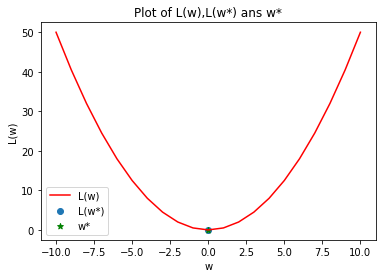

In [5]:
plot_LW(1,0,0)

(ii) a = 0.1, b = 0, c = 0

    Minimum : 0
    Minimizer : 0

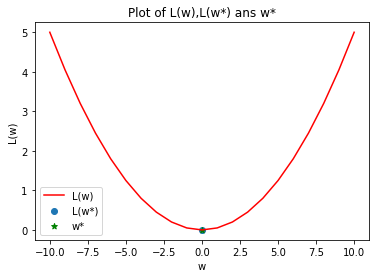

In [6]:
plot_LW(0.1,0,0)

(iii) a = 10, b = 0, c = 0

    Minimum : 0
    Minimizer : 0

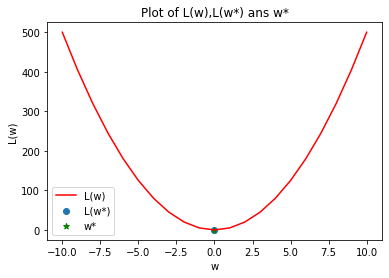

In [7]:
plot_LW(10,0,0)

(iv) a = 1, b = 0, c = 10

    Minimum : 10
    Minimizer : 0

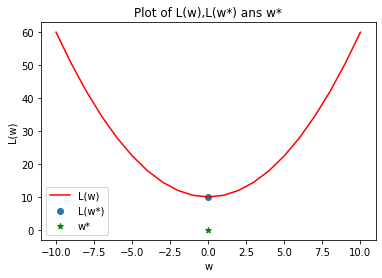

In [8]:
plot_LW(1,0,10)

(v) a = 1, b = 1, c = 1

    Minimum : 0.5
    Minimizer : -1

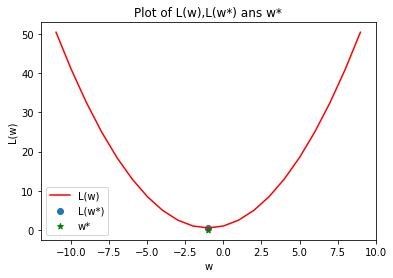

In [9]:
plot_LW(1,1,1)

(vi) a = 0.1, b = -1, c = -1

    Minimum : -6
    Minimizer : 10

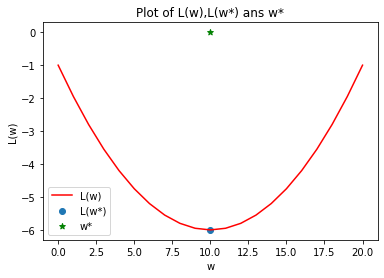

In [10]:
plot_LW(0.1,-1,-1)

###**Q2.Gradient Descent in 1D**###
Running the gradient descent algorithm for T = 1....10,100,1000 and plotting L(w),L(w_t) and w_t - w*.

**Algorithm**
    
    w(t+1) = w(t) - (alpha)*((dL(w)/dw)|w = w(t))
    here,
      w(t) : w at iteration t(or time t)
      alpha : step size parameter
      dL(w)/dw|w=w(t) is the derivative of L(w) wrt w at w = w(t).

**function :** This function takes a value and numbers a,b,c and generates a function based on the given parameters.If a,b,c are not given,then we use another function : xcos(πx)(which is used in Q3),else we generate the function mentioned in Q1.

In [11]:
def function(x,a = 0,b = 0,c = 0):
  if (a == 0 and b == 0 and c == 0):
    return x * np.cos(np.pi * x)
  else : 
    return a*(x**2)/2 + b*x + c

**derivative :**This function is used to generate the derivative of the function based on the parameters.If a,b,c are not given,it generates the derivative of xcos(πx),else generates derivative of the function in Q1 which is equal to a*x + b.

In [12]:
def derivative(val,a = 0,b = 0,c = 0):
  if (a == 0 and b == 0 and c == 0):
    return np.cos(np.pi * val) - (np.pi)*(val)*(np.sin(np.pi * val))
  else :
    return a*val + b

**gradient_descent1D :** This function takes an initial w to start gradient descent,number of iterations(T),step size for gradient descent(alpha),decay for momentum(beta) and the parameters for the function.It runs the gradient descent algorithm and plots the required graphs.

In [13]:
def gradient_descent1D(w,T,alpha,beta = 1,a = 0,b = 0,c = 0):
  #initializing lists to store w and iteration number.
  w_list = []
  itr_list = []
  #storing the initial value of w given.
  initial_w = w
  #appending initial values to the lists.
  w_list.append(w)
  itr_list.append(0)
  #initialing variable to store velocity(for adding momentum to gradient descent) at iteration t.
  v_t = 0
  for i in range(T):  #iterating through given T
    v_t = (1-beta)*v_t + beta*(derivative(w,a,b,c))#calculating velocity at the current iteration.  
    w = w - (alpha)*v_t#calculating w at the current iteration.
    #appending the required values to their respective lists.
    w_list.append(w)
    itr_list.append(i+1)

  #converting the lists into numpy arrays.
  w_t = np.array(w_list)
  iterations = np.array(itr_list)
  #evaluating the L(w_t) function with calculated w_t.
  L_t = function(w_t,a,b,c)
  
  #based on the given parameters,we generate points so as to choose appropriate x-axis range.
  if  (a == 0 and b == 0 and c == 0):#if none of the parameters are given,we generate the points according to the function xcos(πx).
    w_min = 1.0757#min value of the function.
    w = np.linspace(-1.5,1.5,100)#range in which we are performing gradient descent.
  else :#else we generate the points according to the function (a/2)*(w^2) + b*(w) + c.
    w_min = -b/a#min value of the function.
    distance = abs(initial_w - w_min)#choosing the appropriate range for plotting.
    w = np.linspace(w_min - distance,w_min + distance,100)
  #calculating the values of the function based on generated "w".
  L = function(w,a,b,c)

  #plotting L(w) and L(w_t).
  plt.plot(w,L,c = "r",label = "L(w)")
  plt.plot(w_t,L_t,marker = "o",c = "black",label = "L(w_t)")
  plt.title("Plot of L(w) and L(w_t)")
  plt.xlabel("w")
  plt.ylabel("L(w)")
  plt.legend()
  plt.show()

  #plotting w_t - w* vs iteration count.
  it = np.array(iterations)
  plt.plot(it,w_t - w_min,c = "b",label = "w_t - w*")
  plt.title("Plot of w_t - w*")
  plt.xlabel("Iterations")
  plt.ylabel("w_t - w*")
  plt.legend()
  plt.show()
  

Running gradient descent algorithm for T = 10,100,1000 and fixing all the other paramters.
    
    intial w = 1
    alpha = 1.5(step size for which the w_t oscillates and converges)
    beta = 1(i.e no momentum)
    function = (1/2)*(w^2) + 0*(w) + 0 -> (w^2)/2.

WHEN T = 10


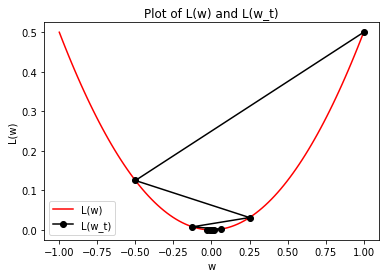

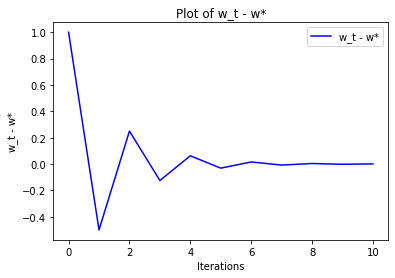



WHEN T = 100


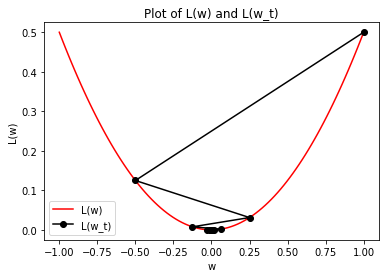

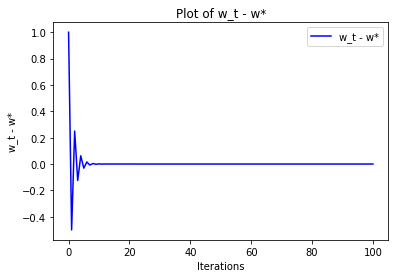



WHEN T = 1000


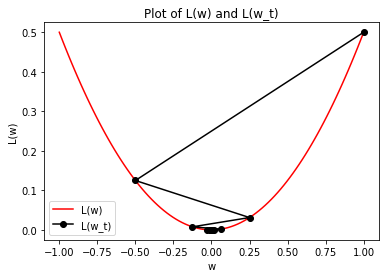

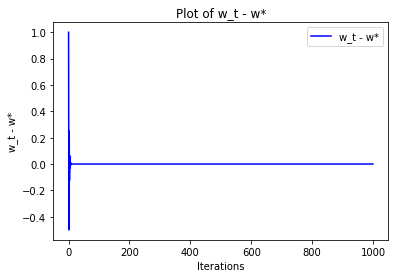

In [14]:
i = 10
while i <= 1000:
  print("WHEN T = " + str(i))
  gradient_descent1D(w=1,T=i,alpha = 1.5,beta = 1,a = 1,b = 0,c = 0)
  i *= 10
  print("\n")

Running gradient descent algorithm for different values of alpha such that

(i) the iterates wt are on the same side of w∗ and converge to w∗ (SC)

(ii) the iterates wt oscillate on both sides of w∗ and converge to w∗.(OC)

(iii) the iterates wt oscillate on both sides of w∗, but diverge to inf.(OD)

1.For a = 1, b = 0, c = 0
    
    for SC : 0 < alpha <= 1
    for OC : 1 < alpha < 2
    for OD : 2 < alpha 

WHEN ALPHA = 0.5


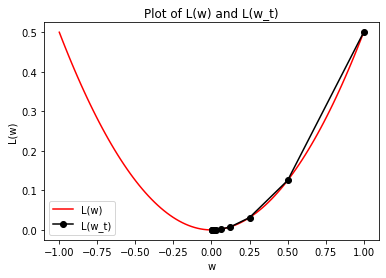

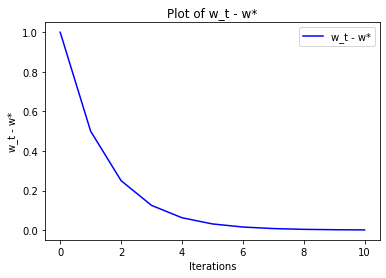



WHEN ALPHA = 1.5


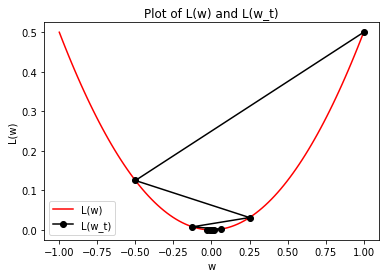

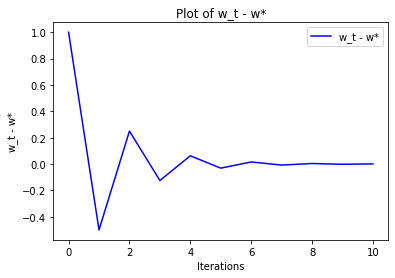



WHEN ALPHA = 2.5


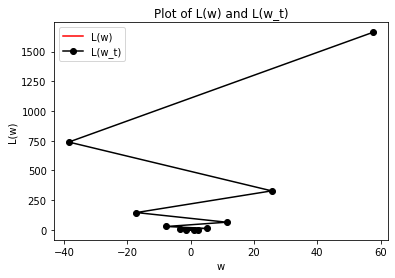

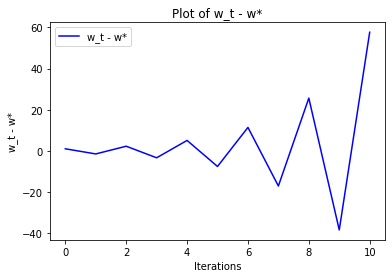

In [15]:
i = 0.5
while i <= 2.5:
  print("WHEN ALPHA = " + str(i))
  gradient_descent1D(w = 1,T = 10,alpha = i,beta = 1,a = 1,b = 0,c = 0)
  i += 1
  print("\n")

2.For a = 0.1, b = 0, c = 0
    
    for SC : 0 < alpha <= 10
    for OC : 10 < alpha < 20
    for OD : 20 < alpha 

WHEN ALPHA = 5


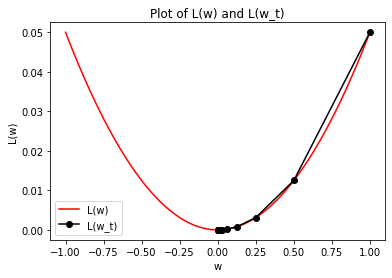

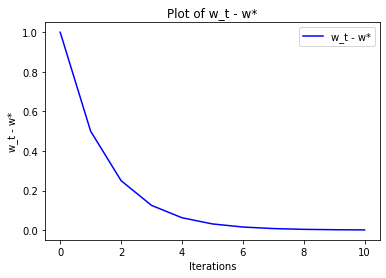



WHEN ALPHA = 15


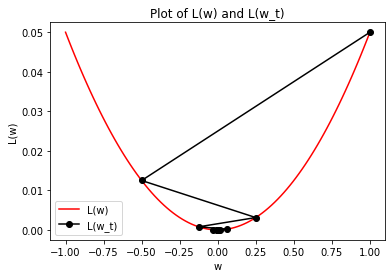

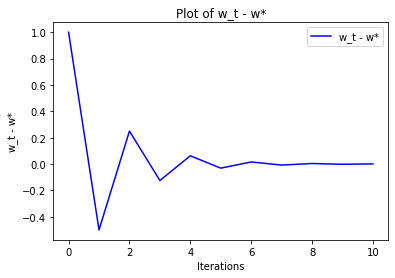



WHEN ALPHA = 25


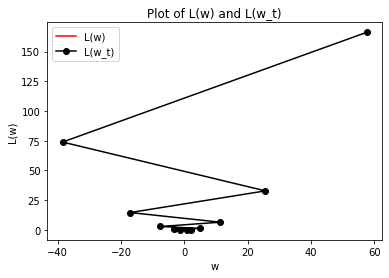

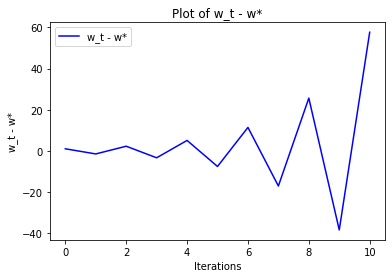

In [16]:
i = 5
while i <= 25:
  print("WHEN ALPHA = " + str(i))
  gradient_descent1D(w = 1,T = 10,alpha = i,beta = 1,a = 0.1,b = 0,c = 0)
  i += 10
  print("\n")

3.For a = 10, b = 0, c = 0
    
    for SC : 0 < alpha <= 0.1
    for OC : 0.1 < alpha < 0.2
    for OD : 0.2 < alpha 

WHEN ALPHA = 0.05


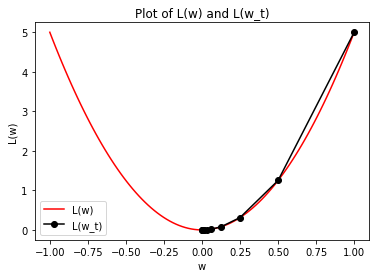

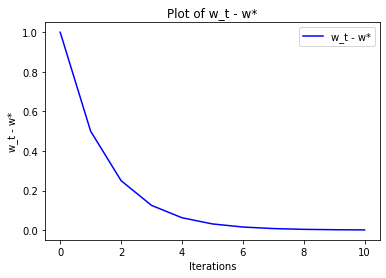



WHEN ALPHA = 0.15000000000000002


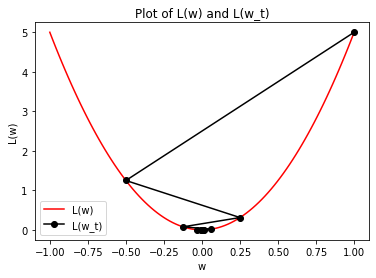

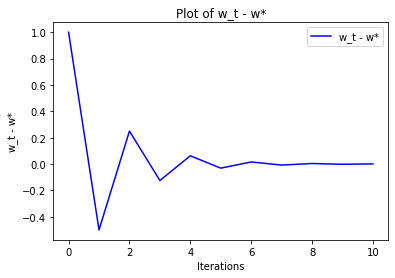



WHEN ALPHA = 0.25


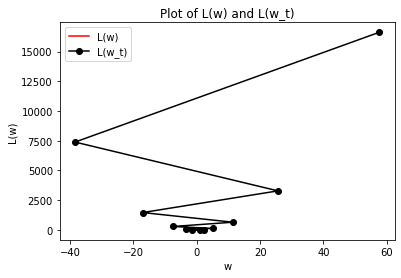

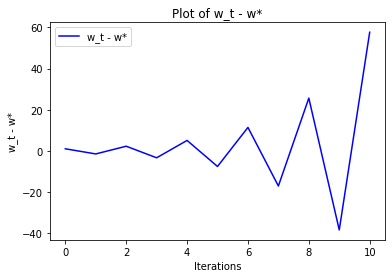

In [17]:
i = 0.05
while i <= 0.25:
  print("WHEN ALPHA = " + str(i))
  gradient_descent1D(w = 1,T = 10,alpha = i,beta = 1,a = 10,b = 0,c = 0)
  i += 0.1
  print("\n")

4.For a = 1, b = 0, c = 10
    
    for SC : 0 < alpha <= 1
    for OC : 1 < alpha < 2
    for OD : 2 < alpha 

WHEN ALPHA = 0.5


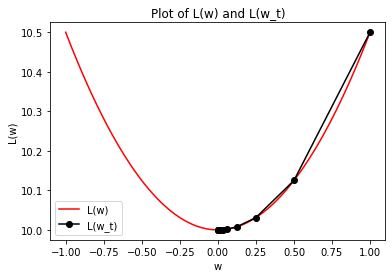

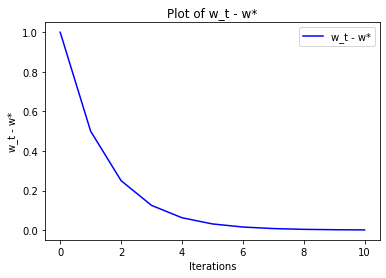



WHEN ALPHA = 1.5


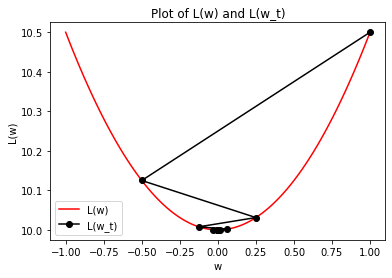

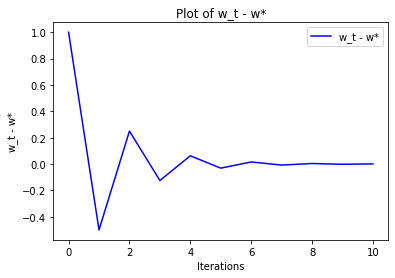



WHEN ALPHA = 2.5


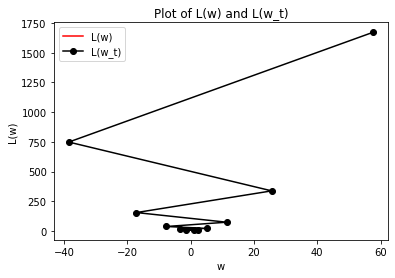

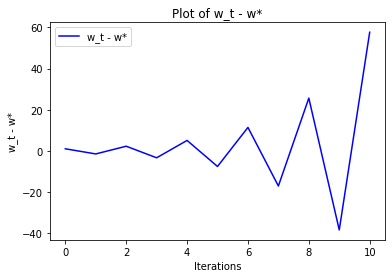

In [18]:
i = 0.5
while i <= 2.5:
  print("WHEN ALPHA = " + str(i))
  gradient_descent1D(w = 1,T = 10,alpha = i,beta = 1,a = 1,b = 0,c = 10)
  i += 1
  print("\n")

5.For a = 1, b = 1, c = 1
    
    for SC : 0 < alpha <= 1
    for OC : 1 < alpha < 2
    for OD : 2 < alpha 

WHEN ALPHA = 0.5


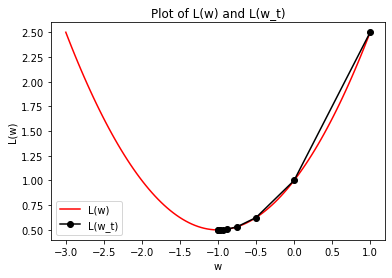

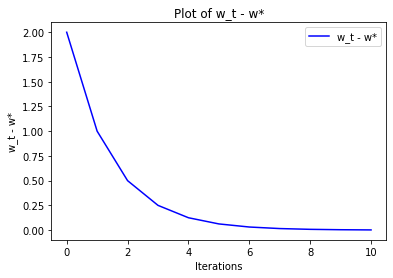



WHEN ALPHA = 1.5


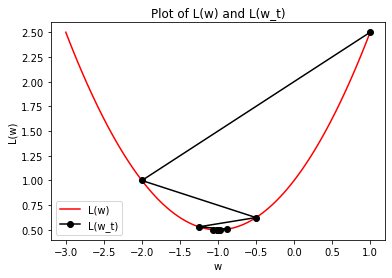

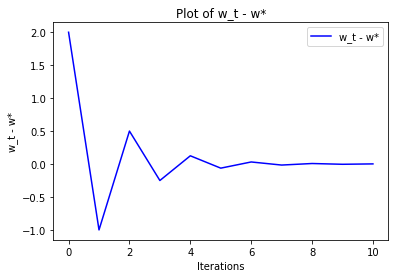



WHEN ALPHA = 2.5


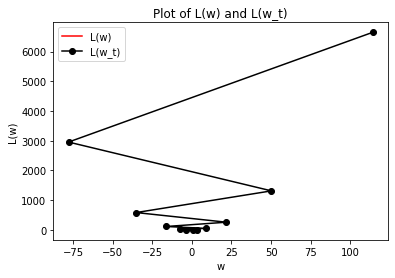

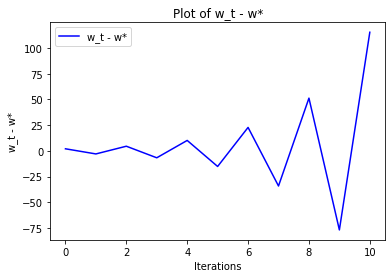

In [19]:
i = 0.5
while i <= 2.5:
  print("WHEN ALPHA = " + str(i))
  gradient_descent1D(w = 1,T = 10,alpha = i,beta = 1,a = 1,b = 1,c = 1)
  i += 1
  print("\n")

6.For a = 0.1, b = -1, c = -1
    
    for SC : 0 < alpha <= 10
    for OC : 10 < alpha < 20
    for OD : 20 < alpha 

WHEN ALPHA = 5


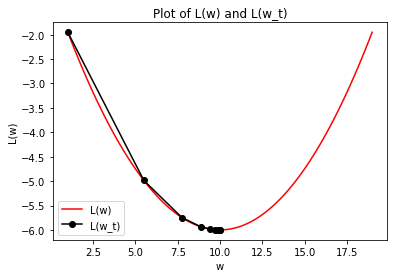

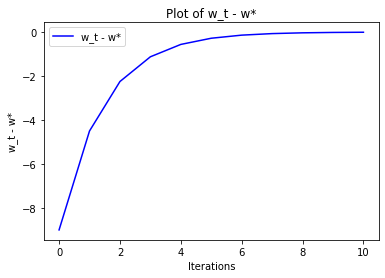



WHEN ALPHA = 15


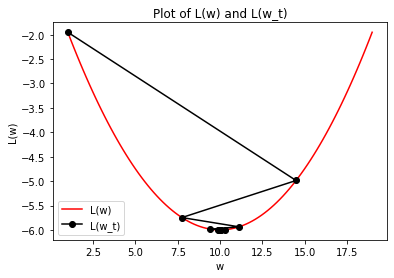

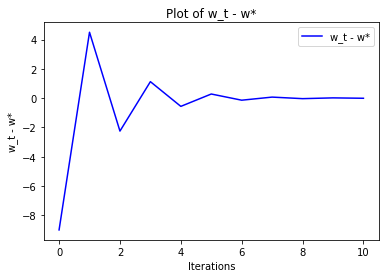



WHEN ALPHA = 25


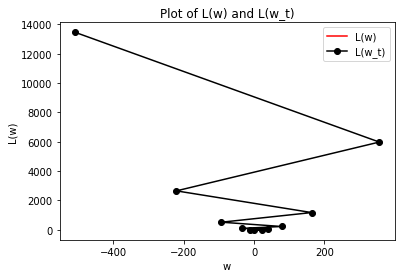

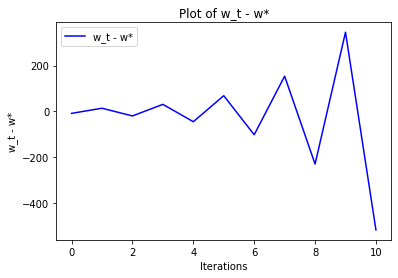

In [ ]:
i = 5
while i <= 25:
  print("WHEN ALPHA = " + str(i))
  gradient_descent1D(w = 1,T = 10,alpha = i,beta = 1,a = 0.1,b = -1,c = -1)
  i += 10
  print("\n")

###**Q3.Gradient Descent in 1D with momentum**###

Comparing gradient descent and gradient descent with momentum on a function with multiple local minima.

The function used : xcos(πx).

The plot of the function in the range [-1,2] is as follows : 

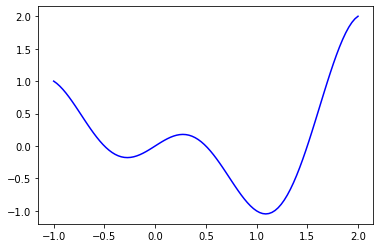

In [ ]:
temp = np.linspace(-1,2,100)
plt.plot(temp,function(temp),c = "b")

Gradient Descent without momentum : 

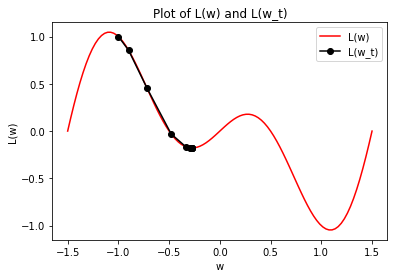

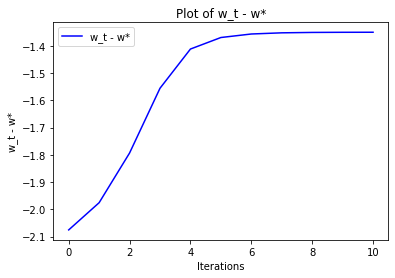

In [ ]:
gradient_descent1D(w = -1,T = 10,alpha = 0.1)

As seen above,the gradient descent algorithm doesnot always find the global minima of a function.To correct this,we add momentum to our descent,due to which there is faster convergence and reduced oscillation.We do this by adding a fraction of previous velocity.

Gradient momentum with momentum

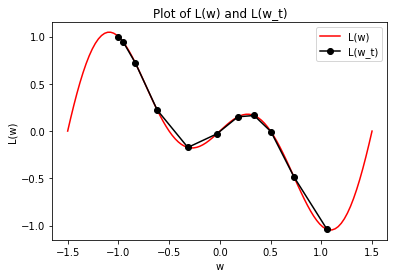

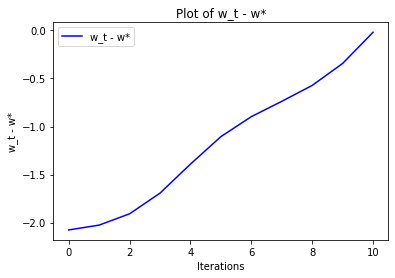

In [ ]:
gradient_descent1D(w = -1,T = 10,alpha = 0.5,beta = 0.1)

###**Q4.Gradient Descent in 2D**###

**f :** This function returns the value of a function given the parameters and value to be assigned to the function.

In [ ]:
def f(w_1,w_2,a,b,c,d,e):
  return a*w_1**2 + b*w_2**2 + c*w_1 + d*w_2 + e

**partial_w1 :** This function generates the partial derivative of the function wrt w1 and returns its value at given input.

In [ ]:
def partial_w1(val,a,c):
  return 2*a*val + c 

**partial_w2 :** This function generates the partial derivative of the function wrt w2 and returns its value at given input.

In [ ]:
def partial_w2(val,b,d):
  return 2*b*val + d

**plt_contour :** This function is used to show the negative gradient direction and generate contour plot for the function with given parameters.

In [ ]:
def plt_contour(a,b,c,d,e):
  #generating equally spaced numbers between -20 and 20.
  x = np.linspace(-20.0, 20.0, 20)
  y = np.linspace(-20.0, 20.0, 20)
  #generating a mesh grid.
  W1, W2 = np.meshgrid(x, y)
  #calculating the value of function with respective W1 and W2.
  L = f(W1,W2,a,b,c,d,e)
  #finding gradient at each point(i.e partial derivative)
  dW1 = partial_w1(W1,a,c)
  dW2 = partial_w2(W2,b,d)
  #normalizing the gradient.
  norm = np.linalg.norm(np.array((dW1,dW2)),axis = 0)
  dW1 /= norm
  dW2 /= norm
  #contour plot
  plt.contourf(W1,W2,L,15)
  #plotting the negative gradient direction.
  plt.quiver(W1, W2, -dW1, -dW2, color='white')
  plt.colorbar()

**Contour Plots :**

f = 1/2 * w_1 ^ 2 + 1/2 * w_2 ^ 2 

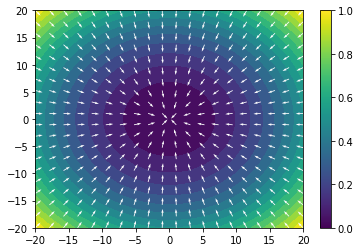

In [ ]:
plt_contour(0.5,0.5,0,0,0)

f = 5 * w_1 ^ 2 + 1/2 * w_2 ^ 2

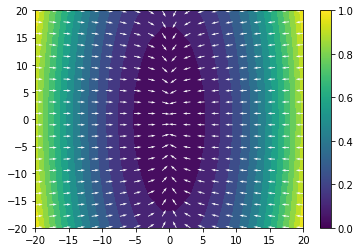

In [ ]:
plt_contour(5,0.5,0,0,0)

 f = 1/2 * w_1 ^ 2 + 5 * w_2 ^ 2

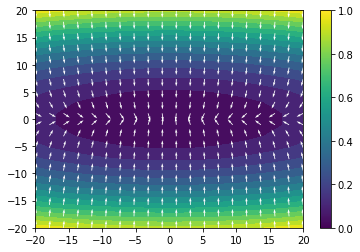

In [ ]:
plt_contour(0.5,5,0,0,0)

f = 1/2 * w_1 ^ 2 + 1/2 * w_2 ^ 2 + 5 * w_1 - (3 * w_2) - 2

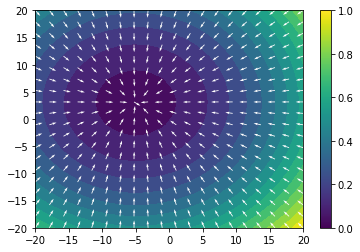

In [ ]:
plt_contour(0.5,0.5,5,-3,-2)

**gradient_descent2D :** This function takes thenumber of iterations(T),step-size(alpha) and appropriate parameters for the function and plots the trajectories of gradient descent algorithm on the contour plot.

In [ ]:
def gradient_descent2D(T,alpha_1,alpha_2,a,b,c,d,e):
  #initializing lists to store w and iteration number.
  w_list = []
  itr_list = []
  #starting at w1 = 20 and w2 = 20
  w1_t = 20
  w2_t = 20
  #appending initial values to the lists.
  w_list.append((w1_t,w2_t))
  itr_list.append(0)
  for i in range(T):  
    w1_t = w1_t - alpha_1 * partial_w1(w1_t,a,c)#calculating w1 at the current iteration.
    w2_t = w2_t - alpha_2 * partial_w2(w2_t,b,d)#calculating w2 at the current iteration.
    #appending the required values to their respective lists.
    w_list.append((w1_t,w2_t))
    itr_list.append(i+1)

  #converting the lists into numpy arrays.
  w_t = np.array(w_list)
  iterations = np.array(itr_list)
  #evaluating the L(w_t) function with calculated w_t.
  L_t = f(w_t[:,0],w_t[:,1],a,b,c,d,e)

  #contour plot for the function.
  plt_contour(a,b,c,d,e)
  #plotting the gradient descent trajectory.
  plt.plot(w_t[:,0],w_t[:,1],c = "black")
  plt.show()
  
  #minimum values(i.e values obtained when partial derivatives are equated to 0)
  w1_min = -c/2*a
  w2_min = -d/2*b
  #plotting w1_t - w1_min and w2_t - w2_min for reference.
  plt.plot(iterations,w_t[:,0] - w1_min,c = "b",label = "w1 - w1_min")
  plt.title("Plot of w1 - w1_min")
  plt.xlabel("Iterations")
  plt.ylabel("w1 - w1_min")
  plt.show()
  plt.plot(iterations,w_t[:,1] - w2_min,c = "b",label = "w2 - w2_min")
  plt.title("Plot of w2 - w2_min")
  plt.xlabel("Iterations")
  plt.ylabel("w2 - w2_min")
  plt.show()

(i)No oscillation

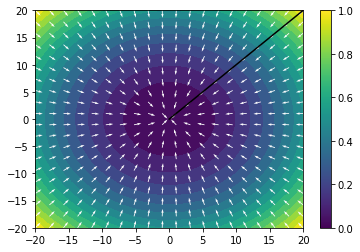

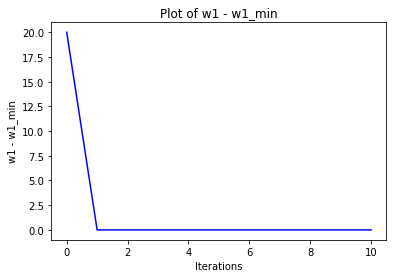

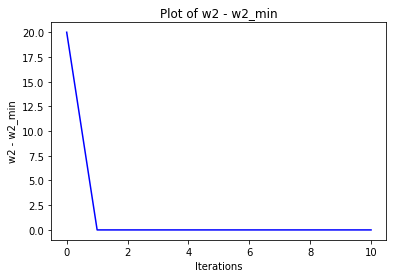

In [ ]:
gradient_descent2D(T = 10,alpha_1 = 1,alpha_2 = 1,a = 0.5,b = 0.5,c = 0,d = 0,e = 0)

(ii)Oscillating in one coordinate

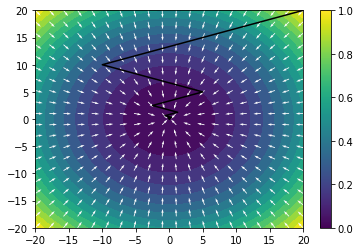

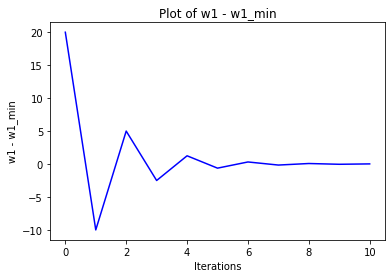

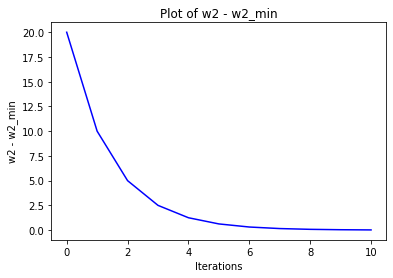

In [ ]:
gradient_descent2D(T = 10,alpha_1 = 1.5,alpha_2 = 0.5,a = 0.5,b = 0.5,c = 0,d = 0,e = 0)

(iii)One-sided Convergence

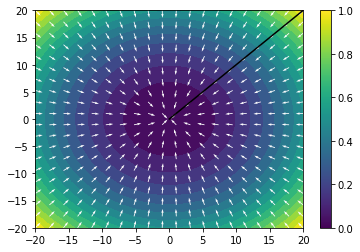

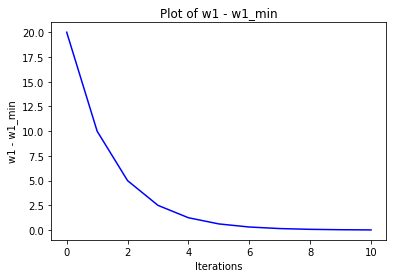

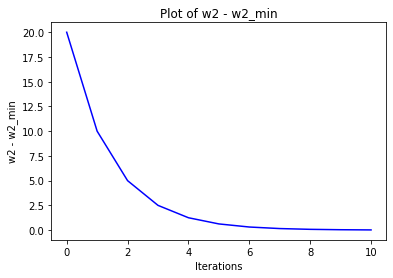

In [ ]:
gradient_descent2D(T = 10,alpha_1 = 0.5,alpha_2 = 0.5,a = 0.5,b = 0.5,c = 0,d = 0,e = 0)

(iv)Oscillating in both coordinates

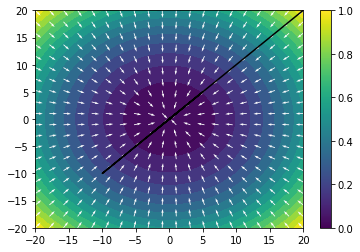

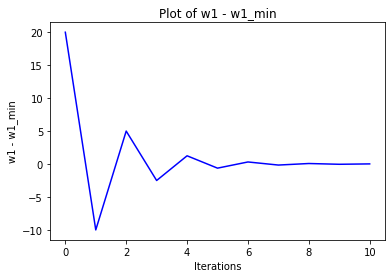

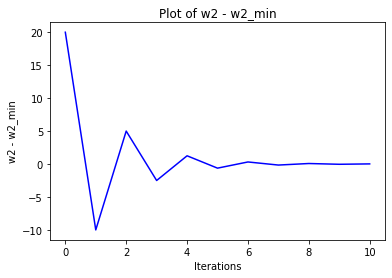

In [ ]:
gradient_descent2D(T = 10,alpha_1 = 1.5,alpha_2 = 1.5,a = 0.5,b = 0.5,c = 0,d = 0,e = 0)

(v)Diverging 

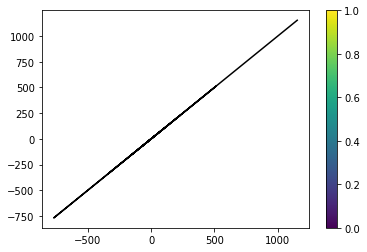

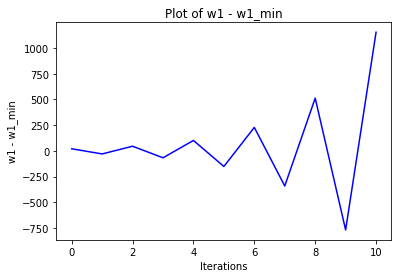

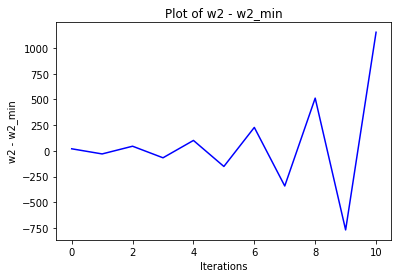

In [ ]:
gradient_descent2D(T = 10,alpha_1 = 2.5,alpha_2 = 2.5,a = 0.5,b = 0.5,c = 0,d = 0,e = 0)